# Detect book spines using OpenShelves

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from roboflow import Roboflow

In [2]:
# Initialize the Roboflow project
rf = Roboflow(api_key="2KHaMqvZ2Q34NQlR6pnw")  # Gina's API key
project = rf.workspace().project("open-shelves")
model = project.version(1).model

# Load the image and run the model
image_path = "/Users/gbuck/Desktop/books_booklore/IMG_0230.jpg"
predictions = model.predict(image_path, confidence=40).json()  # Remove 'overlap'

# Inspect the structure of the predictions
#print(predictions)

# Extract bounding boxes
if predictions.get("predictions"):
    bounding_boxes = [
        {
            "x": prediction["x"],
            "y": prediction["y"],
            "width": prediction["width"],
            "height": prediction["height"]
        } for prediction in predictions["predictions"]
    ]
    print("Bounding Boxes:", bounding_boxes)
else:
    print("No books detected in the image.")

loading Roboflow workspace...
loading Roboflow project...
Bounding Boxes: [{'x': 962.5, 'y': 1531.5, 'width': 589.0, 'height': 2717.0}, {'x': 1724.0, 'y': 1525.0, 'width': 316.0, 'height': 2722.0}, {'x': 2052.0, 'y': 1530.5, 'width': 336.0, 'height': 2783.0}, {'x': 3281.5, 'y': 1719.5, 'width': 719.0, 'height': 2361.0}, {'x': 1398.0, 'y': 1523.0, 'width': 390.0, 'height': 2756.0}, {'x': 2760.5, 'y': 1544.5, 'width': 503.0, 'height': 2717.0}, {'x': 2384.0, 'y': 1533.5, 'width': 376.0, 'height': 2757.0}, {'x': 3413.5, 'y': 434.5, 'width': 689.0, 'height': 73.0}, {'x': 3405.0, 'y': 355.0, 'width': 686.0, 'height': 102.0}]


## Inspect which books were segmented

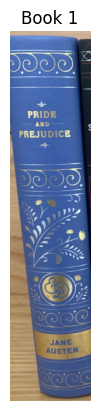

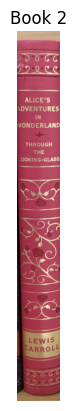

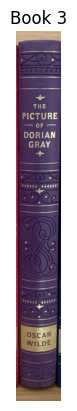

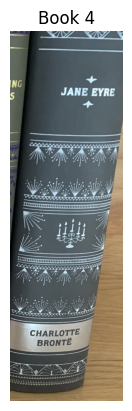

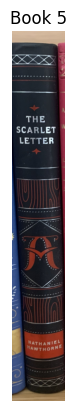

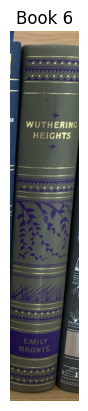

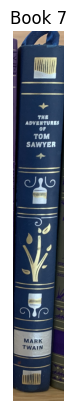

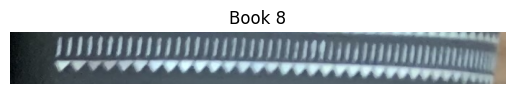

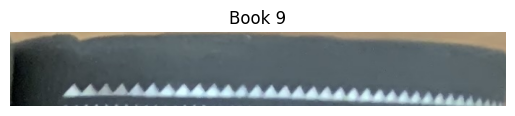

In [3]:
# Load the image
image_path = "/Users/gbuck/Desktop/books_booklore/IMG_0230.jpg"
image = cv2.imread(image_path)

# Crop and display each bounding box
for i, bbox in enumerate(bounding_boxes):
    x, y, width, height = int(bbox["x"]), int(bbox["y"]), int(bbox["width"]), int(bbox["height"])
    # Calculate top-left and bottom-right coordinates
    x1, y1 = x - width // 2, y - height // 2
    x2, y2 = x + width // 2, y + height // 2
    cropped_image = image[y1:y2, x1:x2]  # Crop the region

    # Convert to RGB for display
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Display the cropped region
    plt.figure()
    plt.imshow(cropped_image_rgb)
    plt.title(f"Book {i+1}")
    plt.axis("off")
    plt.show()

## Perform OCR on Valid book spines 

In [5]:
import easyocr

# Initialize OCR reader
reader = easyocr.Reader(['en']) # English language

# Perform OCR on each valid bounding box
for i, bbox in enumerate(bounding_boxes[:7]):  # Adjust range if needed based on valid detections
    x, y, width, height = int(bbox["x"]), int(bbox["y"]), int(bbox["width"]), int(bbox["height"])
    x1, y1 = x - width // 2, y - height // 2
    x2, y2 = x + width // 2, y + height // 2
    cropped_image = image[y1:y2, x1:x2]  # Crop the region

    # Run OCR on the cropped region
    text_result = reader.readtext(cropped_image, detail=0)  # Extract text only
    print(f"Book {i+1} Detected Text: {text_result}")

Book 1 Detected Text: ['PRIDE', 'AND', 'PREJUDICE', 'JANE', 'AUSTEN']
Book 2 Detected Text: ["ALICE'S", 'ADVENTURES', 'IN', 'NONDERLAND', 'THROUGH', 'THE', 'LOOKING-GLASS', 'LEWIS', 'CARROLL']
Book 3 Detected Text: ['THE', 'PICTURE', 'OF', 'DORIAN', 'GRAY', 'OSCAR', 'WILDE']
Book 4 Detected Text: ['ING', '5', 'JANE EYRE', 'iiiii', 'CHARLOTTE', 'BRONTE']
Book 5 Detected Text: ['THE', 'SCARLET', 'LETTER', 'nathanIEL', 'MawThORnE', 'K']
Book 6 Detected Text: ['9', 'WUTHERING', 'HEIGHTS', 'EMILY', 'BRONTE']
Book 7 Detected Text: ['THE', 'Kdvehtures', 'Op', 'TOM', 'SAWYER', '@)', 'MARK', 'TWAIN']
